Este notebook realiza un Análisis Exploratorio de Datos (EDA) sobre un conjunto de datos de películas, actores y miembros del equipo de producción. Se exploran relaciones clave entre variables como presupuesto y popularidad, se identifican posibles outliers, y se analizan patrones en la industria del cine. Además, se visualizan datos relevantes mediante gráficos y nubes de palabras para extraer información útil que podría mejorar un sistema de recomendación de películas. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [9]:
# Cargar los datasets
movies_df = pd.read_parquet("C:/Users/E B M/Documents/proyecto_mp/dataset_limpio/movies_dataset_cleaned.parquet")
cast_df = pd.read_parquet("C:/Users/E B M/Documents/proyecto_mp/dataset_limpio/cast.parquet")
crew_df = pd.read_parquet("C:/Users/E B M/Documents/proyecto_mp/dataset_limpio/crew.parquet")



--- Información del DataFrame: Movies ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45379 entries, 0 to 45378
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   belongs_to_collection  4488 non-null   object        
 1   budget                 45379 non-null  float64       
 2   genres                 42995 non-null  object        
 3   id                     45379 non-null  object        
 4   original_language      45368 non-null  object        
 5   overview               44438 non-null  object        
 6   popularity             45377 non-null  object        
 7   production_companies   33580 non-null  object        
 8   production_countries   39165 non-null  object        
 9   release_date           45376 non-null  datetime64[ns]
 10  revenue                45379 non-null  float64       
 11  runtime                45130 non-null  float64       
 12  spoken_languages 

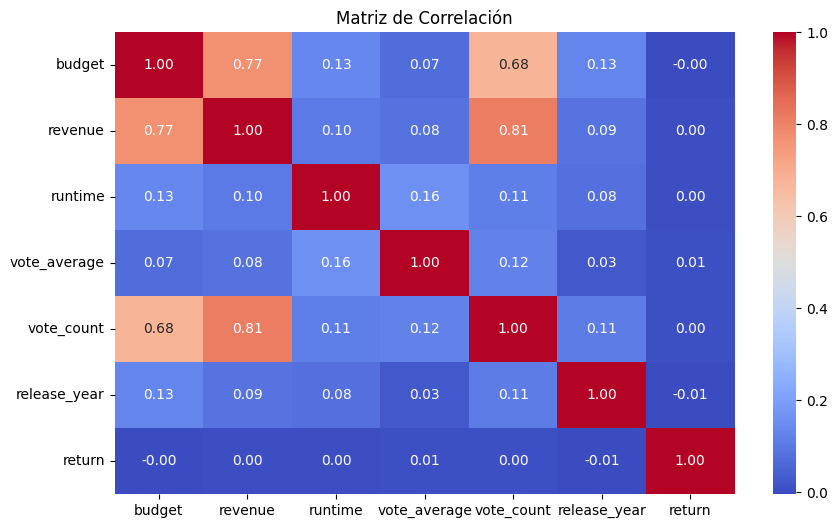

In [5]:

# Resumen de datos
def resumen_datos(df, nombre):
    print(f"\n--- Información del DataFrame: {nombre} ---")
    print(df.info())
    print("\n--- Descripción Estadística ---")
    print(df.describe())
    print("\n--- Valores Nulos ---")
    print(df.isnull().sum())

resumen_datos(movies_df, "Movies")
resumen_datos(cast_df, "Cast")
resumen_datos(crew_df, "Crew")

# Matriz de correlación
plt.figure(figsize=(10, 6))
numeric_cols = movies_df.select_dtypes(include=[np.number])  # Selecciona solo columnas numéricas
if not numeric_cols.empty:
    sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Matriz de Correlación")
    plt.show()
else:
    print("No hay columnas numéricas en el DataFrame para calcular la correlación.")


La matriz de correlación mostrada revela relaciones significativas entre variables clave del conjunto de datos de películas, se observa una fuerte correlación positiva entre el presupuesto (budget) y los ingresos (revenue), así como entre la cantidad de votos (vote_count) y los ingresos, lo que sugiere que las películas con mayores presupuestos y más votos tienden a generar más ingresos, además, la duración de las películas (runtime) muestra una correlación moderada con la cantidad de votos y los ingresos. Por otro lado, el retorno (return) presenta correlaciones muy débiles con todas las demás variables, indicando que no está fuertemente relacionado con el presupuesto, los ingresos, etc.

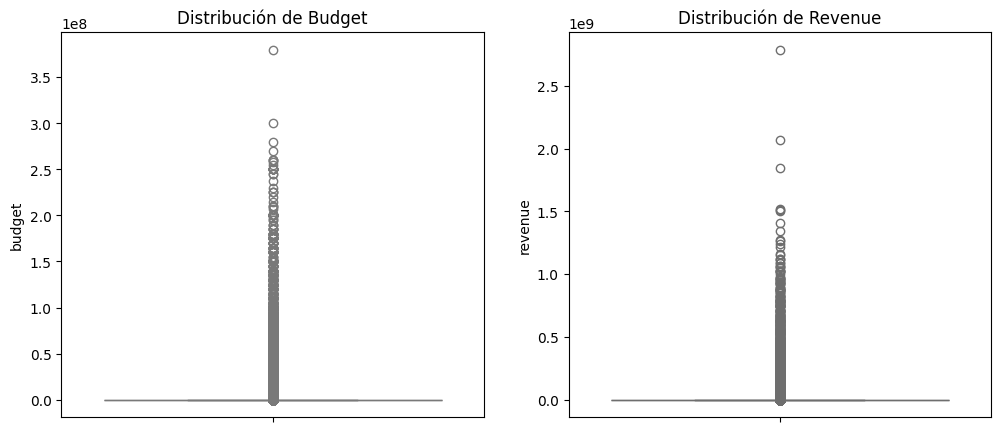

In [6]:
# Boxplots para detectar outliers en revenue y budget
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(y=movies_df['budget'], ax=axes[0], color='lightblue')
axes[0].set_title('Distribución de Budget')
sns.boxplot(y=movies_df['revenue'], ax=axes[1], color='lightcoral')
axes[1].set_title('Distribución de Revenue')
plt.show()

Ambos diagramas de caja muestran distribuciones sesgadas hacia la derecha, lo que significa que hay muchas películas con presupuestos e ingresos relativamente bajos, y unas pocas películas con presupuestos e ingresos extremadamente altos.
La presencia de valores atípicos indica que hay películas que se desvían significativamente de la tendencia general en términos de presupuesto e ingresos, esto podría deberse a películas de gran éxito o a producciones con presupuestos inflados.

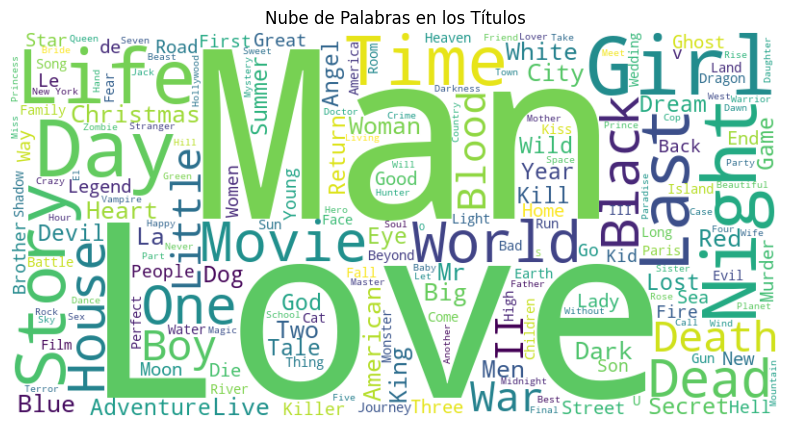

In [13]:
# Nube de palabras para los títulos de películas
text = ' '.join(movies_df['title'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Nube de Palabras en los Títulos")
plt.show()

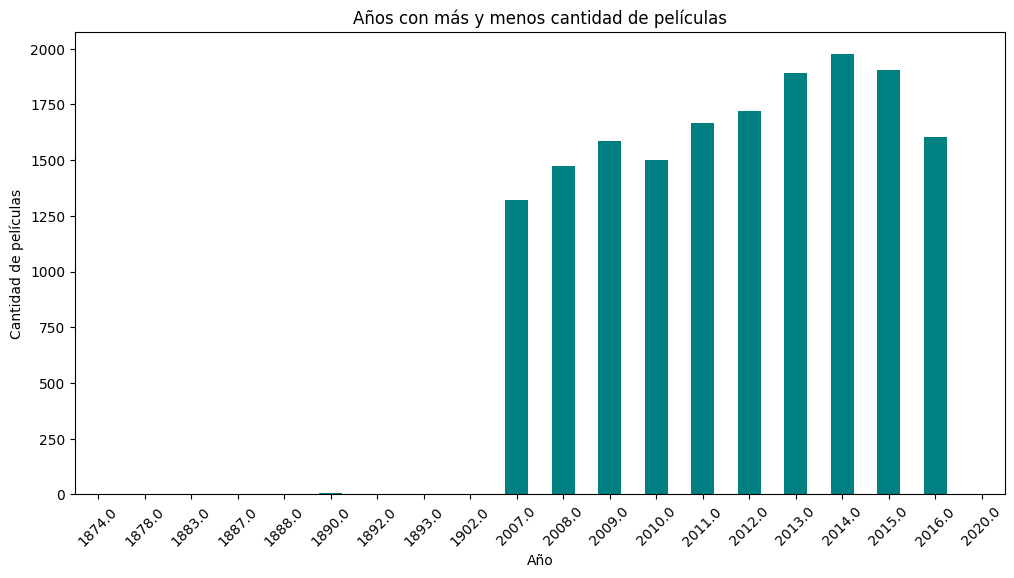

In [14]:


# Contar la cantidad de películas por año
movies_per_year = movies_df['release_year'].value_counts().sort_index()

# Seleccionar los 10 años con más películas y los 10 con menos películas
top_years = movies_per_year.nlargest(10)  # 10 años con más películas
bottom_years = movies_per_year.nsmallest(10)  # 10 años con menos películas

# Concatenar ambos grupos y ordenarlos por año
selected_years = pd.concat([bottom_years, top_years]).sort_index()

# Graficar
plt.figure(figsize=(12, 6))
selected_years.plot(kind='bar', color='teal')
plt.title("Años con más y menos cantidad de películas")
plt.xlabel("Año")
plt.ylabel("Cantidad de películas")
plt.xticks(rotation=45)
plt.show()

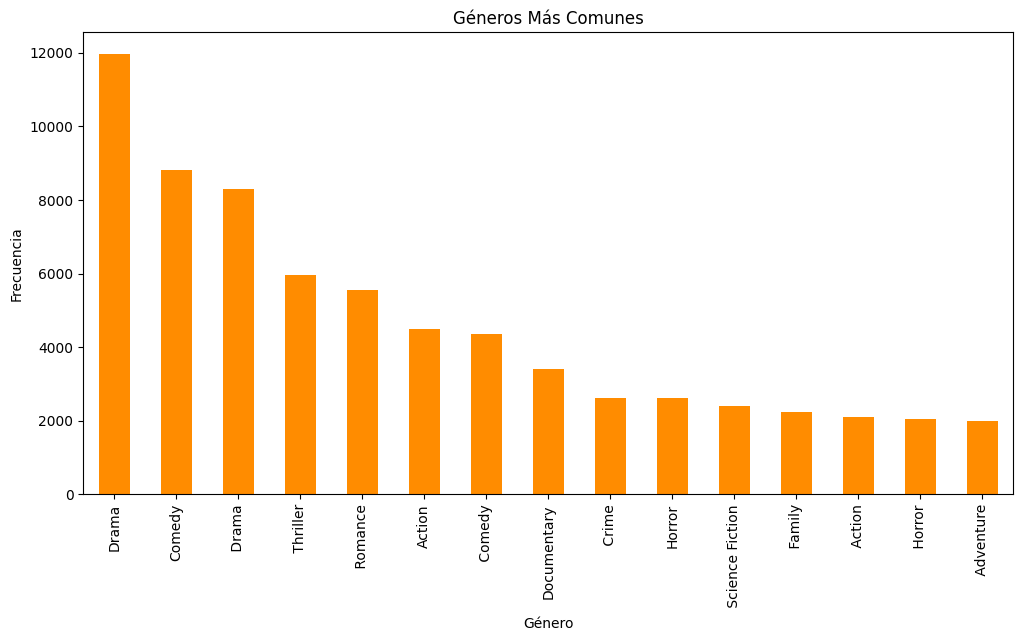

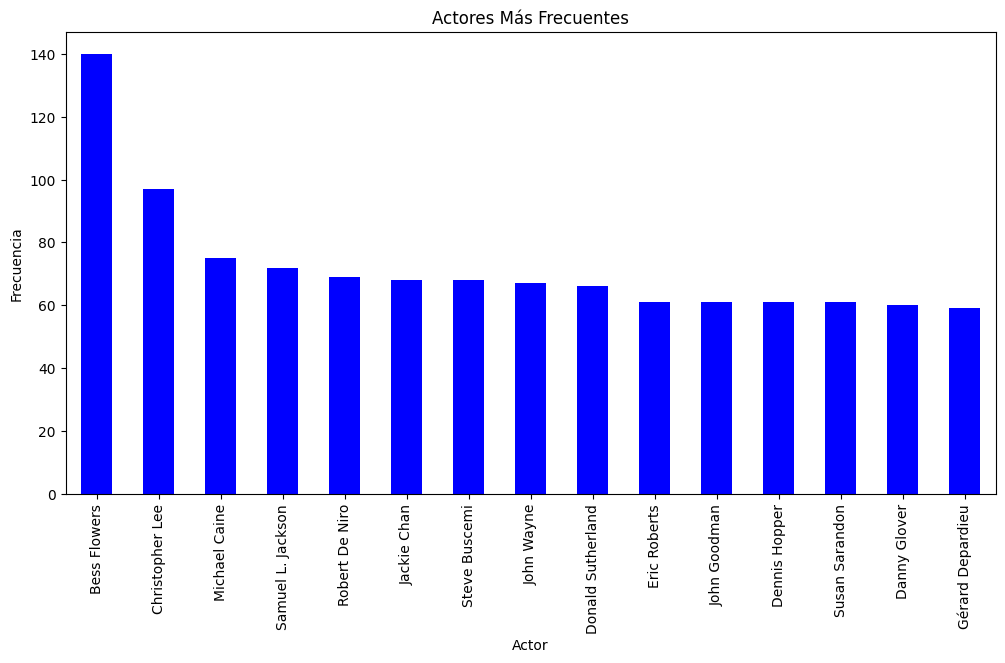

In [8]:
# Análisis de los géneros más comunes
genres_series = movies_df['genres'].dropna().str.split(',').explode()
plt.figure(figsize=(12, 6))
genres_series.value_counts().head(15).plot(kind='bar', color='darkorange')
plt.title("Géneros Más Comunes")
plt.xlabel("Género")
plt.ylabel("Frecuencia")
plt.show()

# Actores más frecuentes en el dataset
plt.figure(figsize=(12, 6))
cast_df['name'].value_counts().head(15).plot(kind='bar', color='blue')
plt.title("Actores Más Frecuentes")
plt.xlabel("Actor")
plt.ylabel("Frecuencia")
plt.show()

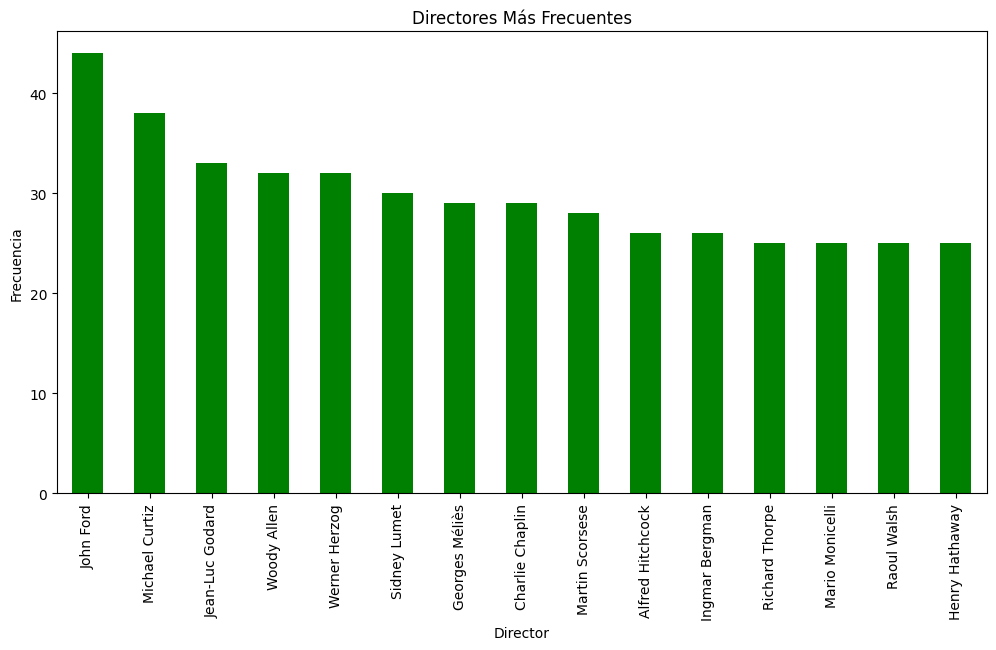

In [15]:
# Directores más frecuentes en el dataset
plt.figure(figsize=(12, 6))
crew_df[crew_df['job'] == 'Director']['name'].value_counts().head(15).plot(kind='bar', color='green')
plt.title("Directores Más Frecuentes")
plt.xlabel("Director")
plt.ylabel("Frecuencia")
plt.show()


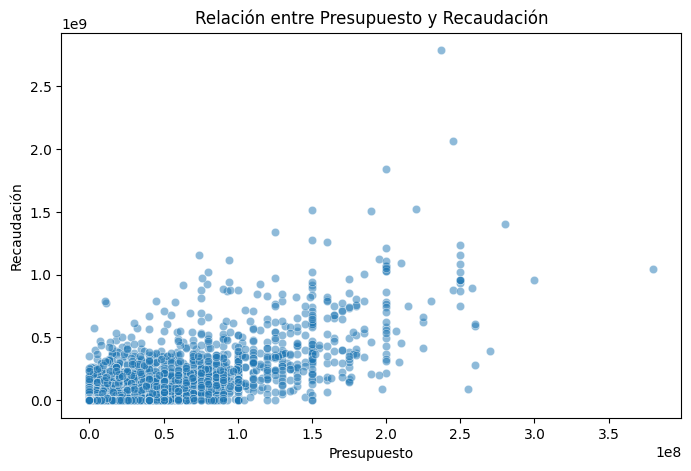

In [16]:

# 20 Análisis adicionales

# 1. Relación entre presupuesto y recaudación
plt.figure(figsize=(8, 5))
sns.scatterplot(x=movies_df['budget'], y=movies_df['revenue'], alpha=0.5)
plt.title("Relación entre Presupuesto y Recaudación")
plt.xlabel("Presupuesto")
plt.ylabel("Recaudación")
plt.show()

Se observa una tendencia general ascendente en la gráfica, a medida que el presupuesto de una película aumenta, la recaudación también tiende a aumentar esto indica una correlación positiva entre las dos variables, los puntos están dispersos alrededor de la tendencia general, lo que significa que la relación no es perfecta, hay películas con presupuestos similares que tienen recaudaciones muy diferentes, se pueden observar algunos puntos que se desvían significativamente de la tendencia general, estos puntos representan películas con presupuestos o recaudaciones inusualmente altos o bajos en comparación con la mayoría.

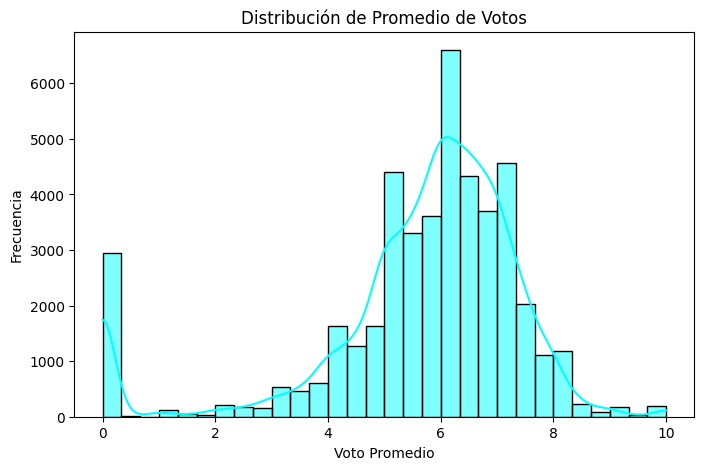

In [18]:
# 4. Distribución de votos
plt.figure(figsize=(8, 5))
sns.histplot(movies_df['vote_average'], bins=30, kde=True, color='cyan')
plt.title("Distribución de Promedio de Votos")
plt.xlabel("Voto Promedio")
plt.ylabel("Frecuencia")
plt.show()


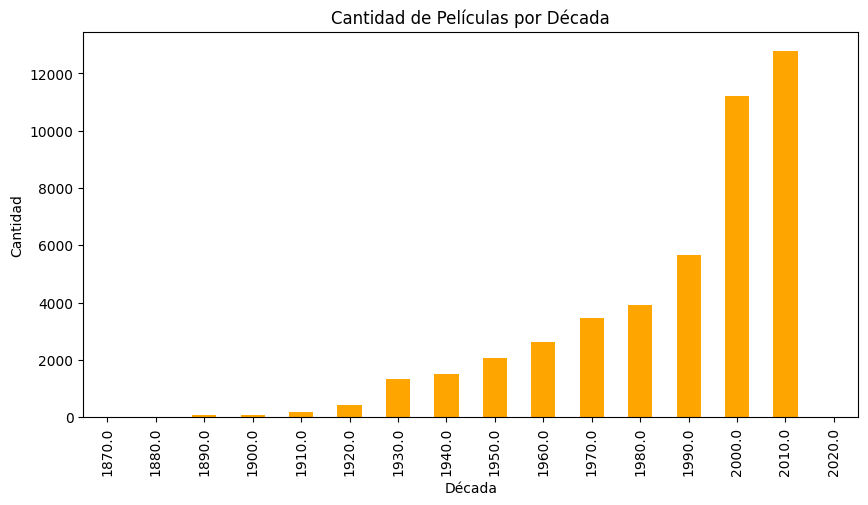

In [7]:
# 6. Cantidad de películas por década
decades = (movies_df['release_year'] // 10) * 10
plt.figure(figsize=(10, 5))
decades.value_counts().sort_index().plot(kind='bar', color='orange')
plt.title("Cantidad de Películas por Década")
plt.xlabel("Década")
plt.ylabel("Cantidad")
plt.show()


El aumento en la producción de películas se acelera notablemente en las últimas décadas, especialmente a partir de la década de 1990. Esto sugiere un crecimiento exponencial en la industria cinematográfica en tiempos recientes.

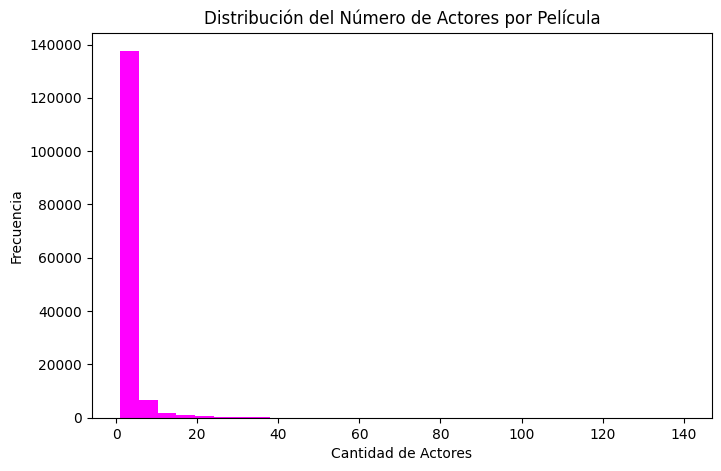

In [4]:


# 7. Distribución del número de actores por película
plt.figure(figsize=(8, 5))
cast_df['id'].value_counts().plot(kind='hist', bins=30, color='magenta')
plt.title("Distribución del Número de Actores por Película")
plt.xlabel("Cantidad de Actores")
plt.ylabel("Frecuencia")
plt.show()



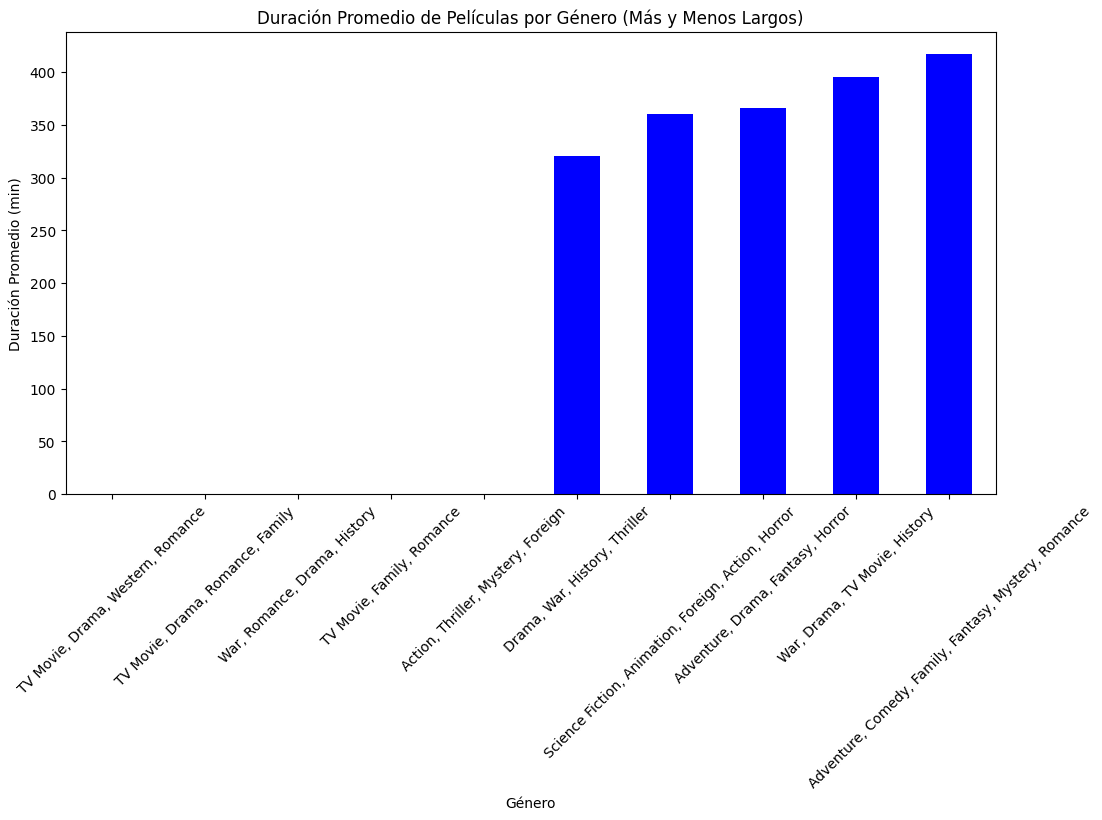

In [6]:
# Calcular la duración promedio por género
avg_runtime_per_genre = movies_df.groupby('genres')['runtime'].mean().sort_values()

# Seleccionar los 5 géneros con mayor duración promedio y los 5 con menor duración promedio
top_genres = avg_runtime_per_genre.nlargest(5)  # 5 géneros con mayor duración
bottom_genres = avg_runtime_per_genre.nsmallest(5)  # 5 géneros con menor duración

# Concatenar ambos grupos y ordenarlos por duración promedio
selected_genres = pd.concat([bottom_genres, top_genres]).sort_values()

# Graficar
plt.figure(figsize=(12, 6))
selected_genres.plot(kind='bar', color='blue')
plt.title("Duración Promedio de Películas por Género (Más y Menos Largos)")
plt.xlabel("Género")
plt.ylabel("Duración Promedio (min)")
plt.xticks(rotation=45)
plt.show()

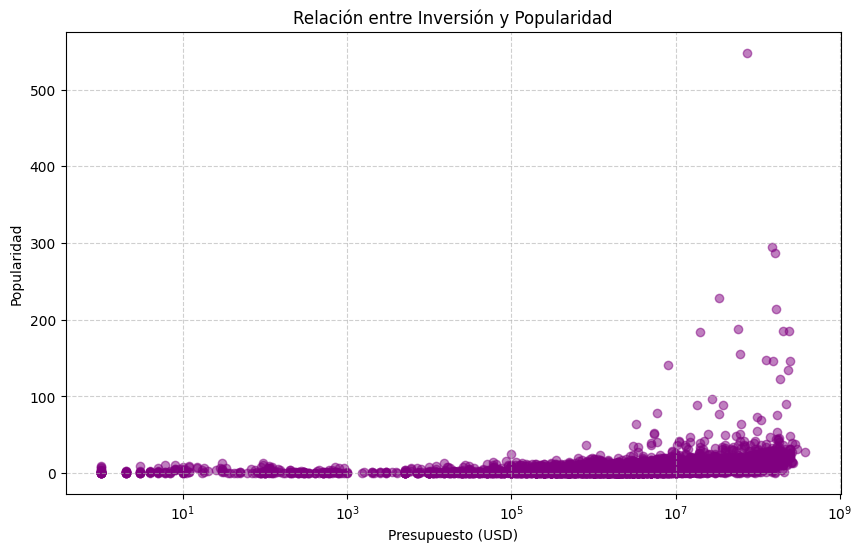

In [12]:
# Convertir las columnas a numéricas, forzando los valores no numéricos a NaN
movies_df['budget'] = pd.to_numeric(movies_df['budget'], errors='coerce')
movies_df['popularity'] = pd.to_numeric(movies_df['popularity'], errors='coerce')

# Filtrar valores positivos
movies_filtered = movies_df[(movies_df['budget'] > 0) & (movies_df['popularity'] > 0)]

# Crear la gráfica de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(movies_filtered['budget'], movies_filtered['popularity'], alpha=0.5, color='purple')

# Escala logarítmica para el presupuesto
plt.xscale('log')
plt.xlabel("Presupuesto (USD)")
plt.ylabel("Popularidad")
plt.title("Relación entre Inversión y Popularidad")
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

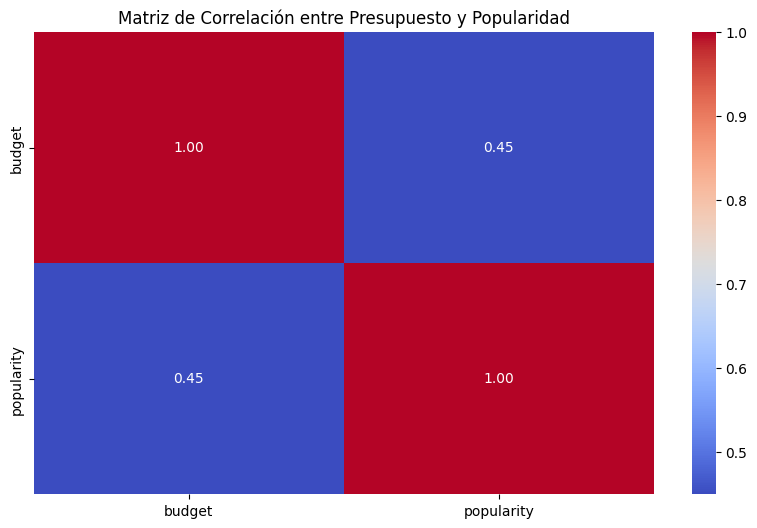

C:\Users\E B M\AppData\Local\Temp\ipykernel_5680\4230552043.py:38: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='avg_budget', y='avg_popularity', size='movie_count', hue='name', data=actor_stats, palette='tab10', legend=False, edgecolor='black')


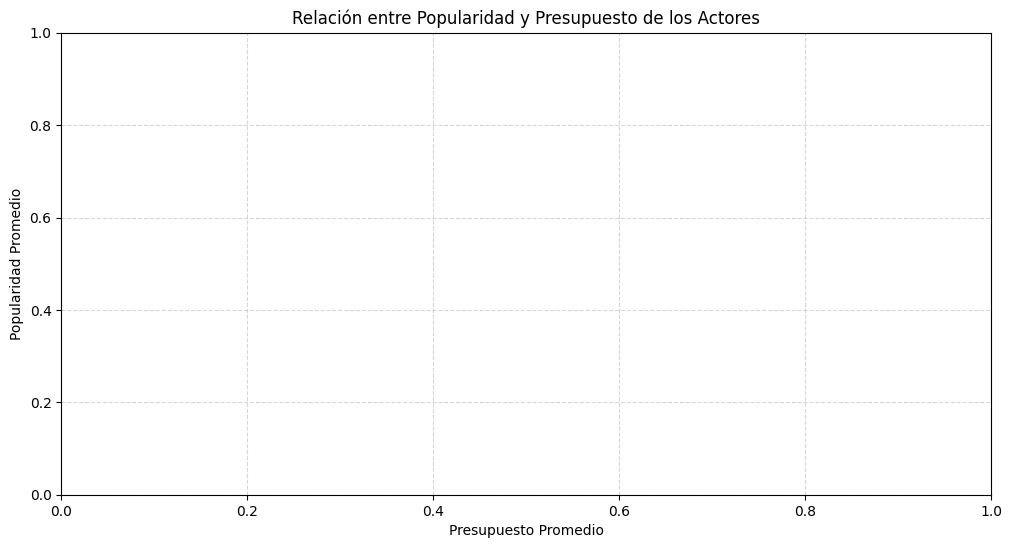

In [20]:
# Matriz de correlación con variables específicas
plt.figure(figsize=(10, 6))
selected_cols = ['budget', 'popularity']  # Variables seleccionadas
corr_matrix = movies_df[selected_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación entre Presupuesto y Popularidad")
plt.show()

# Asegurar que las columnas sean del mismo tipo
movies_df['id'] = movies_df['id'].astype(str)
cast_df['id'] = cast_df['id'].astype(str)

# Asegurar que las columnas numéricas sean del tipo correcto
movies_df['budget'] = pd.to_numeric(movies_df['budget'], errors='coerce')
movies_df['popularity'] = pd.to_numeric(movies_df['popularity'], errors='coerce')

# Fusionar los datos de los actores con las películas
merged_df = cast_df.merge(movies_df[['id', 'popularity', 'budget']], on='id')

# Contar cantidad de películas por actor
actor_counts = merged_df['name'].value_counts()

# Seleccionar los 10 actores con más películas
top_actors = actor_counts.head(10).index

# Filtrar los datos solo para estos actores
top_actors_df = merged_df[merged_df['name'].isin(top_actors)]

# Calcular popularidad y presupuesto promedio por actor
actor_stats = top_actors_df.groupby('name').agg(
    avg_popularity=('popularity', 'mean'),
    avg_budget=('budget', 'mean'),
    movie_count=('name', 'count')
).reset_index()

# Graficar la relación entre popularidad y presupuesto de los actores
plt.figure(figsize=(12, 6))
sns.scatterplot(x='avg_budget', y='avg_popularity', size='movie_count', hue='name', data=actor_stats, palette='tab10', legend=False, edgecolor='black')

# Etiquetas y título
plt.xlabel("Presupuesto Promedio")
plt.ylabel("Popularidad Promedio")
plt.title("Relación entre Popularidad y Presupuesto de los Actores")
plt.grid(True, linestyle='--', alpha=0.5)

# Mostrar gráfico
plt.show()